# Exam 04/07/2025

# Excercise 1

Si consideri il sistema lineare:
     A  x = b 
dove A è la matrice dei coefficienti, b è il termine noto, ed x è il vettore delle incognite da determinare. I dati di questo sistema lineare sono contenuti nel file **matrix-III.mat**.
 - Si implementino e si testino sui dati forniti due metodi che sono adatti a risolvere tale sistema lineare con le caratteristiche delle matrici dei coefficienti date in input. **[punti 7]**
 - Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati. **[punti 2]**

In [86]:
import numpy as np, scipy


def steepestdescent(A, b, x0, max_it=100, toll=1e-12):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return [], []

    x = x0.copy()
    r = b - A @ x
    it = 0
    nb = np.linalg.norm(b)
    errore = np.linalg.norm(r) / nb
    vec_sol = [x.copy()]
    vet_r = [errore]

    while errore >= toll and it < max_it:
        Ap = A @ r
        alpha = (r.T @ r) / (r.T @ Ap)
        x = x + alpha * r
        r = b - A @ x
        errore = np.linalg.norm(r) / nb
        vec_sol.append(x.copy())
        vet_r.append(errore)
        it += 1

    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x, vet_r, iterates_array, it


def conjugate_gradient(A, b, x0, max_it=100, toll=1e-12):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return [], []

    x = x0.copy()
    r = b - A @ x
    p = r.copy()
    it = 0
    nb = np.linalg.norm(b)
    errore = np.linalg.norm(r) / nb
    vec_sol = [x.copy()]
    vet_r = [errore]

    while errore >= toll and it < max_it:
        it += 1
        Ap = A @ p
        rtr = r.T @ r
        alpha = rtr / (p.T @ Ap)
        x = x + alpha * p
        r_new = r - alpha * Ap
        errore = np.linalg.norm(r_new) / nb
        vec_sol.append(x.copy())
        vet_r.append(errore)
        if errore < toll:
            break
        gamma = (r_new.T @ r_new) / rtr
        p = r_new + gamma * p
        r = r_new

    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x, vet_r, iterates_array, it

[A] è quadratica? True
[A] è simmetrica? True
[A] è positiva? True
[A] è sparsa? True
[A] è grande? dim = (500, 500)
[A] condizionamento? 100.0000000000023


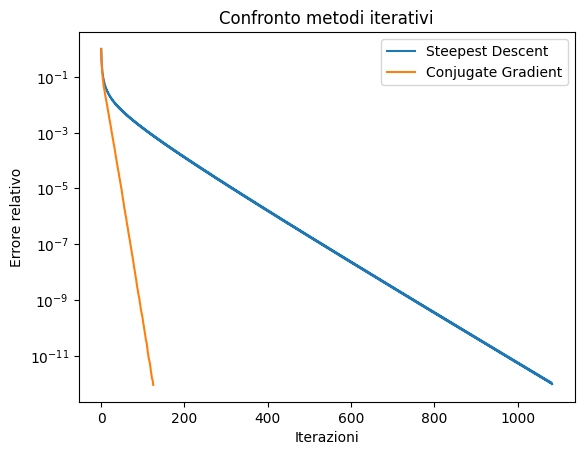

In [87]:
from scipy.io import loadmat
import matplotlib.pylab as plt
import numpy as np

dati = loadmat("./mat/matrix-III.mat")
A = dati["A"]
A = A.astype(float)
b = dati["b"]
b = b.astype(float)


def isQuadratic(A):
    return A.shape[0] == A.shape[1]


def isSymmetric(A):
    return np.allclose(A, A.T)


def isPositive(A):
    return isSymmetric(A) and np.all(np.linalg.eigvals(A) > 0)


def isSparse(A):
    return np.count_nonzero(A) < A.size * 0.33


print("[A] è quadratica?", isQuadratic(A))
print("[A] è simmetrica?", isSymmetric(A))
print("[A] è positiva?", isPositive(A))
print("[A] è sparsa?", isSparse(A))
print("[A] è grande? dim =", A.shape)
print("[A] condizionamento?", np.linalg.cond(A))

max_it = 2000
x0 = np.zeros((b.size, 1))
x_s, xk_s, vet_s, it_s = steepestdescent(A, b, x0, max_it=max_it)
x_cg, xk_cg, vat_cg, it_cg = conjugate_gradient(A, b, x0, max_it=max_it)

plt.semilogy(np.arange(it_s + 1), xk_s, np.arange(it_cg + 1), xk_cg)
plt.legend(["Steepest Descent", "Conjugate Gradient"])
plt.xlabel("Iterazioni")
plt.ylabel("Errore relativo")
plt.title("Confronto metodi iterativi")
plt.show()

# Il metodo del Gradiente Coniugato è molto più efficiente dello Steepest Descent in questo caso, grazie alla struttura della matrice.
# A è grande, sparsa, simmetrica e definita positiva → ideale per CG.
# SD può essere utile per matrici più piccole o come step intermedio, ma non è competitivo su problemi di grandi dimensioni.

Data la matrice, calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu e:
$$
\left[
\begin{array}{cccc}
3.0 &2.0 & 1.0 & -1.0\\
4.0 & 6.0 & 3.0 & 2.0\\
2.0 & 1.0 & 4.0 & 3.0\\
1.0 & 4.0 & 2.0 & 7.0
\end{array}
\right ],
$$
 - sfruttarla per il calcolo del suo determinante (confrontare l'esattezza del calcolo con quello ottenuto usando la funzione numpy.linalg.det) **[punti: 2]**
 - sfruttarla per il calcolo della sua inversa risolvendo n sistemi lineari (confrontare l'inversa con quella ottenuta usando la funzione numpy.linalg.inv) **[punti: 2]**

In [88]:
from scipy.linalg import lu, lu_solve, lu_factor
import numpy as np

A = np.array(
    [
        [3.0, 2.0, 1.0, -1.0],
        [4.0, 6.0, 3.0, 2.0],
        [2.0, 1.0, 4.0, 3.0],
        [1.0, 4.0, 2.0, 7.0],
    ]
)

P, L, U = lu(A)
print("Matrice P:\n", P)
print("Matrice L:\n", L)
print("Matrice U:\n", U)

# === Calcolo determinante con LU ===
# det(A) = det(P) * det(L) * det(U)
# - det(P) è ±1 (permute matrix → +1 se permutazione pari, -1 se dispari)
# - det(L) = 1 perché triangolare inferiore con diagonale 1
# - det(U) = prodotto degli elementi diagonali di U
det_P = np.linalg.det(P)
det_U = np.prod(np.diag(U))
det_LU = det_P * det_U
print("\nDeterminante con LU:", det_LU)

det_direct = np.linalg.det(A)
print("Determinante con numpy.linalg.det:", det_direct)

# === Calcolo inversa risolvendo n sistemi ===
n = A.shape[0]
inv_A = np.zeros_like(A)
lu_fatt, piv = lu_factor(A)

for i in range(n):
    e = np.zeros(n)
    e[i] = 1
    inv_A[:, i] = lu_solve((lu_fatt, piv), e)

# Confronto con numpy.linalg.inv
inv_numpy = np.linalg.inv(A)

print("\nInversa calcolata con LU:")
print(inv_A)

print("\nInversa calcolata con numpy.linalg.inv:")
print(inv_numpy)

# Verifica accuratezza
diff = np.linalg.norm(inv_A - inv_numpy)
print("\nDifferenza tra le due inverse (norma):", diff)

Matrice P:
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Matrice L:
 [[ 1.    0.    0.    0.  ]
 [ 0.75  1.    0.    0.  ]
 [ 0.5   0.8   1.    0.  ]
 [ 0.25 -1.    0.    1.  ]]
Matrice U:
 [[ 4.    6.    3.    2.  ]
 [ 0.   -2.5  -1.25 -2.5 ]
 [ 0.    0.    3.5   4.  ]
 [ 0.    0.    0.    4.  ]]

Determinante con LU: 140.0
Determinante con numpy.linalg.det: 140.00000000000006

Inversa calcolata con LU:
[[ 0.85       -0.45        0.          0.25      ]
 [-0.39285714  0.39285714 -0.14285714 -0.10714286]
 [-0.51428571  0.31428571  0.28571429 -0.28571429]
 [ 0.25       -0.25        0.          0.25      ]]

Inversa calcolata con numpy.linalg.inv:
[[ 0.85       -0.45        0.          0.25      ]
 [-0.39285714  0.39285714 -0.14285714 -0.10714286]
 [-0.51428571  0.31428571  0.28571429 -0.28571429]
 [ 0.25       -0.25        0.          0.25      ]]

Differenza tra le due inverse (norma): 0.0


# Excerise 2

 -  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare [**punti: 7**]
 - Risolvere il sistema di equazioni non lineare 
$$
\left\{
\begin{array}{c}
x_0\cdot x_1+x_0=1 \\
 x_0^2+x_1^2=9
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria. [**punti: 3**]

**Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X^{(0)}$ nell'intorno della soluzione che si vuole approssimare.  Per fare cio',  visualizzare le 
curve di livello corrisponenti a z=0 delle due superfici $z_1 = f_1 (x_0 ,x_1 )$ e $z_2 = f_2(x_0 , x_1 )$ e 
definire come iterato iniziale un vettore $X^{(0)}=(x_0^{(0)},x_1^{(0)})$ oppurtuno le cui componenti appartengono ad un 
intorno della soluzione (cioè  dei punti di  intersezione tra le curve di livello delle due superfici) \]

 - Descrivere teoricamente la variante del Metodo di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili. [**punti: 2**]

In [89]:
import numpy as np


def newton_raphson(
    initial_guess, F_numerical, J_Numerical, max_it=100, tolX=1e-12, tolF=1e-12
):
    X = np.array(initial_guess, dtype=float)
    erroreF = 1 + tolF
    erroreX = 1 + tolX
    er = []
    while len(er) < max_it and erroreX >= tolX and erroreF >= tolF:
        jx = J_Numerical(*X)
        if np.linalg.det(jx) == 0:
            print(
                "La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo"
            )
            return None, None, None

        fx = F_numerical(*X).squeeze()
        s = np.linalg.solve(jx, -fx)
        X = X + s
        norma = np.linalg.norm(X, 1)

        if norma != 0:
            erroreX = np.linalg.norm(s, 1) / norma
        else:
            erroreX = np.linalg.norm(s, 1)

        erroreF = np.linalg.norm(F_numerical(*X).squeeze(), 1)
        er.append(erroreX)

    return X, er, len(er)


def newton_raphson_corde(
    initial_guess, F_numerical, J_Numerical, max_it=100, tolX=1e-12, tolF=1e-12
):
    X = np.array(initial_guess, dtype=float)
    erroreF = 1 + tolF
    erroreX = 1 + tolX
    er = []
    while len(er) < max_it and erroreX >= tolX and erroreF >= tolF:
        if len(er) == 0:
            jx = J_Numerical(*X)
            if np.linalg.det(jx) == 0:
                print(
                    "La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo"
                )
                return None, None, None

        fx = F_numerical(*X).squeeze()
        s = np.linalg.solve(jx, -fx)
        X = X + s
        norma = np.linalg.norm(X, 1)

        if norma != 0:
            erroreX = np.linalg.norm(s, 1) / norma
        else:
            erroreX = np.linalg.norm(s, 1)

        erroreF = np.linalg.norm(F_numerical(*X).squeeze(), 1)
        er.append(erroreX)

    return X, er, len(er)


def newton_raphson_sham(
    initial_guess, update, F_numerical, J_Numerical, max_it=100, tolX=1e-12, tolF=1e-12
):
    X = np.array(initial_guess, dtype=float)
    erroreF = 1 + tolF
    erroreX = 1 + tolX
    er = []
    while len(er) < max_it and erroreX >= tolX and erroreF >= tolF:
        if len(er) % update == 0:
            jx = J_Numerical(*X)
            if np.linalg.det(jx) == 0:
                print(
                    "La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo"
                )
                return None, None, None

        fx = F_numerical(*X).squeeze()
        s = np.linalg.solve(jx, -fx)
        X = X + s
        norma = np.linalg.norm(X, 1)

        if norma != 0:
            erroreX = np.linalg.norm(s, 1) / norma
        else:
            erroreX = np.linalg.norm(s, 1)

        erroreF = np.linalg.norm(F_numerical(*X).squeeze(), 1)
        er.append(erroreX)

    return X, er, len(er)

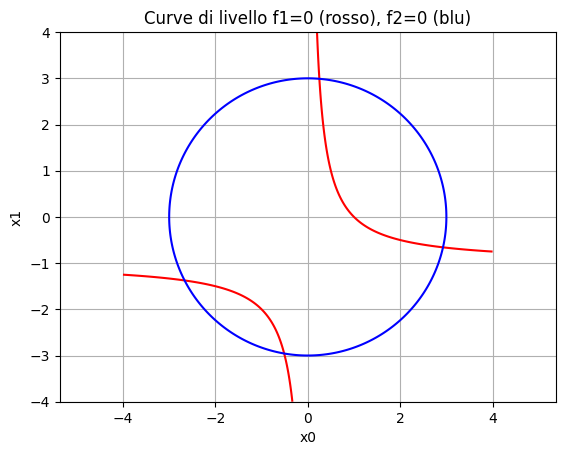

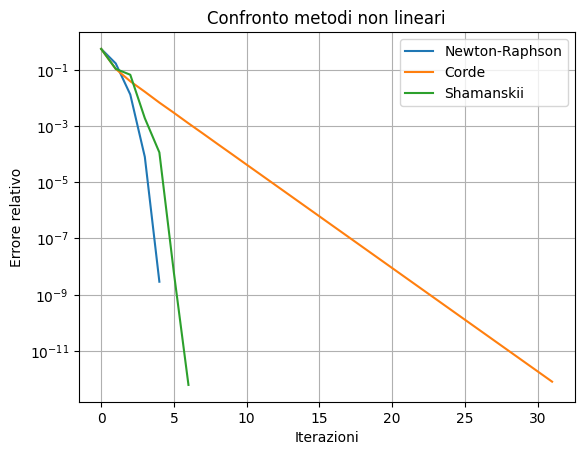

In [90]:
import matplotlib.pylab as plt

def F(x0, x1):
    f1 = x0 * x1 + x0 - 1
    f2 = x0**2 + x1**2 - 9
    return np.array([f1, f2]).reshape(-1, 1)


def J(x0, x1):
    df1_dx0 = x1 + 1
    df1_dx1 = x0
    df2_dx0 = 2 * x0
    df2_dx1 = 2 * x1
    return np.array([[df1_dx0, df1_dx1], [df2_dx0, df2_dx1]])

x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)

Z1 = X * Y + X - 1
Z2 = X**2 + Y**2 - 9

plt.contour(X, Y, Z1, levels=[0], colors='red')
plt.contour(X, Y, Z2, levels=[0], colors='blue')
plt.xlabel("x0")
plt.ylabel("x1")
plt.title("Curve di livello f1=0 (rosso), f2=0 (blu)")
plt.grid(True)
plt.axis("equal")
plt.show()

X0 = [2.0, 4.0]

xN, errN, itN = newton_raphson(X0, F, J)
xC, errC, itC = newton_raphson_corde(X0, F, J)
xS, errS, itS = newton_raphson_sham(X0, 2, F, J)

plt.semilogy(errN, label='Newton-Raphson')
plt.semilogy(errC, label='Corde')
plt.semilogy(errS, label='Shamanskii')
plt.legend()
plt.xlabel("Iterazioni")
plt.ylabel("Errore relativo")
plt.title("Confronto metodi non lineari")
plt.grid(True)
plt.show()


# per trovare un minimo anzichè uno zero, con newton rapshon si applica il grafiente della funzione = 0
# con aggiornamento x(k + 1) = x(k) - H(xk)^(-1) * il gradiente(xk)
# H è la matriche Heissiana.

# Newton-Raphson raggiunge la soglia di errore in meno iterazioni.
# Shamanskii è nel mezzo: curva simile a Newton all'inizio, ma rallenta.
# Le corde convergono più lentamente: curva più piatta.

# Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

Domande a risposta multipla

**1.** Quali sono i passaggi fondamentali all’interno del paradigma generale dell’Intelligenza Artificiale?
 - Acquisizione dati, Data Processing, Addestramento del modello, Predizione e metriche
 - Data Processing, Addestramento del Modello, Predizione, Analisi economica dei risultati
 - Acquisizione dati, Data Processing, Addestramento del modello, Predizione, Test di Turing
 - Acquisizione dati, Addestramento del Modello, Test di Turing, Predizione

In [91]:
# Risposta: PUNTO [**1**]

**2.** Per una rete neurale, l’apprendimento è legato a:
 - Minimizzare la funzione obiettivo
 - Minimizzare la funzione di attivazione
 - Massimizzare il valore dei pesi tramite l’algoritmo di back-propagation
 - Massimizzare il valore della funzione di training

In [92]:
# Risposta: PUNTO [**1**]

**3.**  Il Test di Turing serve a:
 - Valutare se una macchina dimostra un comportamento intelligente
 - Valutare il carico computazionale di un algoritmo di Intelligenza Artificiale
 - Valutare la velocità di risposta di un algoritmo di Intelligenza Artificiale
 - Valutare se una macchina dimostra un comportamento predicibile


In [93]:
# Risposta: PUNTO [**1**]

**4.**
Le ultime e più recenti innovazioni nel campo dell’Intelligenza Artificiale sono:
 - CNN, GAN e Transformers
 - Expert Systems, CNN e GAN
 - Expert Systems, Deep Learning e CNN
 - CNN, Expert Systems e Transformers


In [94]:
# Risposta: PUNTO [**1**]

**5.** A cosa serve il validation set?
 - A trovare i migliori iperparametri del modello
 - Ad addestrare il modello 
 - A testare il modello
 - A trovare le etichette dei dati di input

In [95]:
# Risposta: PUNTO [**1**]

**Domande aperte**

Quale è il ruolo del learning rate nella formula di aggiornamento dei pesi mediante gradient descent. Aggiornamento del learning rate programmato (learning rate scheduling) : step decay, decadimento esponenziale, decadimento dipendente dal tempo. **[punti 2]**

In [96]:
# Il learning rate è un parametro fondamentale nel metodo di discesa del gradiente. 
# Indica quanto grandi sono i passi con cui i pesi della rete vengono aggiornati in ogni iterazione.

# Troppo grande, si rischia di saltare il minimo della funzione di costo e di non far convergere il modello.
# Troppo piccolo, la convergenza sarà molto lenta e il training richiederà troppo tempo.

# Per migliorare la convergenza, il learning rate può essere modificato durante il training secondo alcune strategie
# step decay -> si riduce il learning rate a intervalli fissi
# decadimento esponenziale ->  il learning rate diminuisce gradualmente e in modo esponenziale con il numero di iterazioni
# decadimento dipentende dal tempo -> il learning rate si aggiorna diminuendo in funzione del tempo o delle iterazioni


Learning rate adattivo per ogni peso (durante il processo di ottimizzazione) : Adagrad, RMSProp, Adadelta, Adam. (formula di aggiornamento dei pesi e discussioni)
**[punti 2.5]**

In [97]:
# Durante l’addestramento, il learning rate determina quanto vengono modificati i pesi ad ogni passo. 
# I metodi adattivi regolano automaticamente il learning rate per ogni peso, rendendo l’ottimizzazione più stabile e veloce.

# Adagrad -> Adatta il learning rate a ogni parametro in base alla somma dei quadrati dei gradienti passati.
# vantaggi: utile per dati sparsi, svantaggi: il learning rate può diventare troppo piccolo

# RMSProp -> Modifica Adagrad mantenendo una media mobile dei gradienti.
# vantaggi: risolve il problema del learning rate che si annulla.

# Adadelta -> Variante di RMSProp che non richiede di fissare a priori il learning rate.
# vantaggi: più robusto non ce il bisogno di scegliere iperparametri

# Adam -> 
# vantaggi: adattivo per ogni peso è ottimo pre reti profonde.